In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from sklearn.utils import resample #to downsample the dataset
from sklearn.preprocessing import scale #Scale the dataset
from sklearn.svm import SVC #Support vector machine for classification
from sklearn.metrics import plot_confusion_matrix #Draws a Confusion Matrix
from sklearn.decomposition import PCA #to perform PCA to plot data

from sklearn.linear_model import SGDClassifier

import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

This function splits target column from dataset and transforms ndarray in a C-contiguos array with double precision to avoid data copy on SVM.

In [ ]:
#define a function that split target column from dataset.
def split_train_test(df_monk_train, df_monk_test):
    target_train = df_monk_train[['class']]
    df_monk_train.drop(labels='class', axis=1, inplace=True)
    target_test = df_monk_test[['class']]
    df_monk_test.drop(labels='class', axis=1, inplace=True)
    
    #Transform ndarray in a C-contiguos array with double precision to avoid data copy on SVM
    X_train = np.ascontiguousarray(df_monk_train.values, dtype=np.double)
    X_test = np.ascontiguousarray(df_monk_test.values, dtype=np.double)
    
    y_train = np.ascontiguousarray(target_train.values, dtype=np.double)
    y_test = np.ascontiguousarray(target_test.values, dtype=np.double)

    return X_train, y_train, X_test, y_test

We have defined a mee loss function to evaluate performance for the competition. 

In [ ]:
#define mee loss function 
def mee(true_target, predicted_target):  # assuming target is 2-dim matrix with x and y as columns
    l = true_target.shape[0]
    res = 0

    for p in range(l):  # for p-th pattern in l (number of samples)
        x_diff = np.square(true_target[p, 0] - predicted_target[p, 0])  # difference between the x value of the true and predicted target
        y_diff = np.square(
            true_target[p, 1] - predicted_target[p, 1])  # difference between the y values of true and predicted target
        sum_term = x_diff + y_diff
        res = res + np.sqrt(sum_term)
    res = res / l

    return res

# Classification task

This notebook shows the results achieved with UCI MONK's problems dataset.

## MONK-1 

In [ ]:
#read train dataset
df_monk1_train = pd.read_csv('./data/MONK/monks-1.train', sep=" ", skipinitialspace=True, names=['class','a1','a2','a3','a4','a5','a6','id'])
df_monk1_train.drop(labels='id', axis=1, inplace=True)

#read test dataset
df_monk1_test = pd.read_csv('./data/MONK/monks-1.test', sep=" ", skipinitialspace=True,  names=['class','a1','a2','a3','a4','a5','a6','id'])
df_monk1_test.drop(labels='id', axis=1, inplace=True)

Plotting the train and test data distribution 

<AxesSubplot:ylabel='class'>

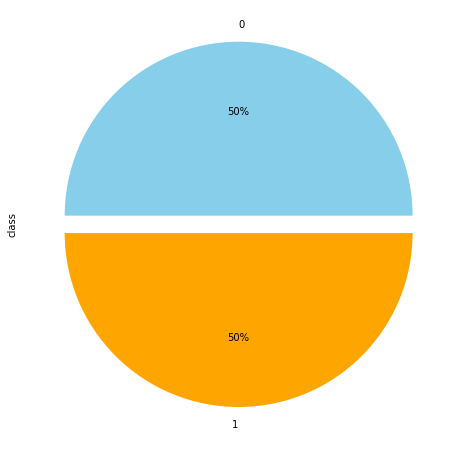

In [ ]:
#plot class distribution in train data
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

df_monk1_train['class'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=['skyblue', 'orange'], explode=(0.05, 0.05))

<AxesSubplot:ylabel='class'>

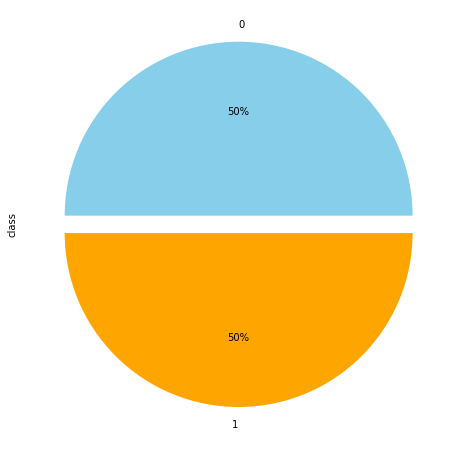

In [ ]:
#plot class distribution in test data
df_monk1_test['class'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=['skyblue', 'orange'], explode=(0.05, 0.05))

Define train and test set with labels

In [ ]:
X_train_M1, y_train_M1, X_test_M1, y_test_M1 = split_train_test(df_monk1_train, df_monk1_test)

In [ ]:
"""
from sklearn.datasets import make_blobs

df_profile_clone = df_copy

plt.figure(figsize=(12,10))
cmap = colors.ListedColormap(['#85db2e', '#c43025'])
plt.scatter(df_profile_clone['01/09/2021_age'].values, df_profile_clone['avg_df'].values, c=df_profile_clone['label'].values, s=7, cmap=cmap)
plt.xlabel("Total Games")
plt.ylabel("avg_df")
plt.show()
"""

'\nfrom sklearn.datasets import make_blobs\n\ndf_profile_clone = df_copy\n\nplt.figure(figsize=(12,10))\ncmap = colors.ListedColormap([\'#85db2e\', \'#c43025\'])\nplt.scatter(df_profile_clone[\'01/09/2021_age\'].values, df_profile_clone[\'avg_df\'].values, c=df_profile_clone[\'label\'].values, s=7, cmap=cmap)\nplt.xlabel("Total Games")\nplt.ylabel("avg_df")\nplt.show()\n'

In [ ]:
'''clf_svm_plot = SVC(C=C_BEST, gamma=GAMMA, kernel=KERNEL, random_state=1)
clf_svm_plot.fit(X, y_testing)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
#X0, X1 = X[:, 0], X[:, 1]
X0, X1 = X['a1'], X['a2']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf_svm_plot, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_testing, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('a2')
ax.set_xlabel('a1')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()'''

"clf_svm_plot = SVC(C=C_BEST, gamma=GAMMA, kernel=KERNEL, random_state=1)\nclf_svm_plot.fit(X, y_testing)\n\nfig, ax = plt.subplots()\n# title for the plots\ntitle = ('Decision surface of linear SVC ')\n# Set-up grid for plotting.\n#X0, X1 = X[:, 0], X[:, 1]\nX0, X1 = X['a1'], X['a2']\nxx, yy = make_meshgrid(X0, X1)\n\nplot_contours(ax, clf_svm_plot, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)\nax.scatter(X0, X1, c=y_testing, cmap=plt.cm.coolwarm, s=20, edgecolors='k')\nax.set_ylabel('a2')\nax.set_xlabel('a1')\nax.set_xticks(())\nax.set_yticks(())\nax.set_title(title)\nax.legend()\nplt.show()"

### One Hot Encoder

In the MONK dataset we have the categories encoded using label encoding (e.g. 0,1,2,..), we need to use one hot encoding in order to have better results (e.g. 001, 010, ..).

In [ ]:
enc_train = OneHotEncoder()
enc_train.fit(X_train_M1)
X_train_M1 = enc_train.transform(X_train_M1).toarray()
print(X_train_M1.shape)

enc_test = OneHotEncoder()
enc_test.fit(X_test_M1)
X_test_M1 = enc_test.transform(X_test_M1).toarray()
print(X_test_M1.shape)

(124, 17)
(432, 17)


In [ ]:
clf_svm_onehot = SVC(C=5, gamma=0.15, kernel='rbf')
clf_svm_onehot.fit(X_train_M1, y_train_M1)

train_pred = clf_svm_onehot.predict(X_train_M1)
test_pred = clf_svm_onehot.predict(X_test_M1)

In [ ]:
print(classification_report(y_train_M1, train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        62
         1.0       1.00      1.00      1.00        62

    accuracy                           1.00       124
   macro avg       1.00      1.00      1.00       124
weighted avg       1.00      1.00      1.00       124



In [ ]:
print(classification_report(y_test_M1, test_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       216
         1.0       1.00      1.00      1.00       216

    accuracy                           1.00       432
   macro avg       1.00      1.00      1.00       432
weighted avg       1.00      1.00      1.00       432



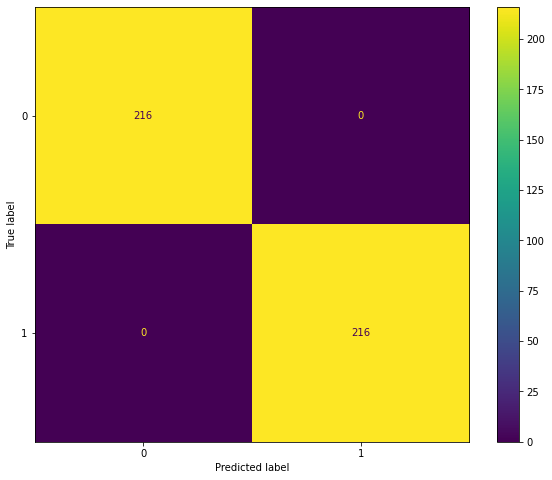

In [ ]:
plot_confusion_matrix(clf_svm_onehot,
                      X_test_M1,
                      y_test_M1,
                      values_format='d',
                      display_labels=['0', '1'])
plt.show()

## MONK-2

In [ ]:
#read train dataset
df_monk2_train = pd.read_csv('./data/MONK/monks-2.train', sep=" ", skipinitialspace=True, names=['class','a1','a2','a3','a4','a5','a6','id'])
df_monk2_train.drop(labels='id', axis=1, inplace=True)

#read test dataset
df_monk2_test = pd.read_csv('./data/MONK/monks-2.test', sep=" ", skipinitialspace=True,  names=['class','a1','a2','a3','a4','a5','a6','id'])
df_monk2_test.drop(labels='id', axis=1, inplace=True)

<AxesSubplot:ylabel='class'>

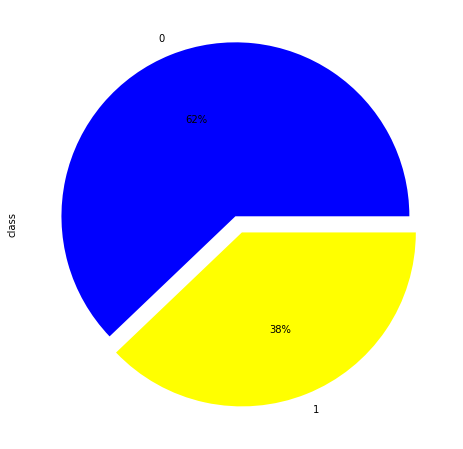

In [ ]:
#plot class distribution in train data
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

df_monk2_train['class'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=['blue', 'yellow'], explode=(0.05, 0.05))

<AxesSubplot:ylabel='class'>

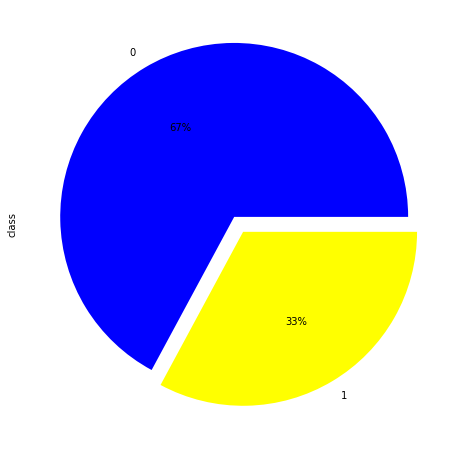

In [ ]:
#plot class distribution in test data
df_monk2_test['class'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=['blue', 'yellow'], explode=(0.05, 0.05))

In [ ]:
X_train_M2, y_train_M2, X_test_M2, y_test_M2 = split_train_test(df_monk2_train, df_monk2_test)

### One Hot Encoder

In [ ]:
enc_train = OneHotEncoder()
enc_train.fit(X_train_M2)
X_train_M2 = enc_train.transform(X_train_M2).toarray()
print(X_train_M2.shape)

enc_test = OneHotEncoder()
enc_test.fit(X_test_M2)
X_test_M2 = enc_test.transform(X_test_M2).toarray()
print(X_test_M2.shape)

(169, 17)
(432, 17)


In [ ]:
par_values = [
    {'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 10, 4000, 4300, 4400, 5000, 1000, 2000, 500, 100],# 15, 25, 50, 100, 250, 500, 1000], #C must be greater than 0
    'gamma': ['scale', 1, 0.15, 0.2, 0.25, 0.009, 0.0095, 0.1, 0.01, 0.001, 0.0001, 0.00001],
    'kernel': ['linear', 'rbf', 'sigmoid']
    },
] 

optimal_par_oh2 = RandomizedSearchCV(
    estimator=SVC(),
    param_distributions=par_values,
    n_iter=150,
    cv=10,
    scoring='accuracy',
    verbose=0
)

optimal_par_oh2.fit(X_train_M2, y_train_M2)
print(optimal_par_oh2.best_params_)

{'kernel': 'rbf', 'gamma': 0.0095, 'C': 5000}


In [ ]:
df_results = pd.DataFrame(data=optimal_par_oh2.cv_results_) #trasform into a pandas dataframe
df_results.sort_values(by="rank_test_score", axis=0, ascending=True, inplace=True) #sort rank values in decreasing order 
df_results.dropna(inplace=True) #delete nan values 
df_results = df_results[:50] #keep only top 50 models
df_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_gamma,param_C,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
61,0.043420,0.009146,0.000608,0.000107,rbf,0.0095,5000,"{'kernel': 'rbf', 'gamma': 0.0095, 'C': 5000}",0.941176,0.705882,...,0.941176,0.941176,0.882353,0.882353,1.000000,0.764706,0.7500,0.851471,0.104080,1
89,0.043776,0.008680,0.000573,0.000031,rbf,0.009,5000,"{'kernel': 'rbf', 'gamma': 0.009, 'C': 5000}",0.941176,0.647059,...,0.941176,0.941176,0.823529,0.882353,1.000000,0.705882,0.7500,0.827941,0.125483,2
100,0.035647,0.012016,0.000572,0.000093,rbf,0.009,4300,"{'kernel': 'rbf', 'gamma': 0.009, 'C': 4300}",0.941176,0.588235,...,0.823529,0.941176,0.764706,0.823529,1.000000,0.529412,0.6875,0.768750,0.157484,3
68,0.035880,0.010842,0.000632,0.000128,rbf,0.009,4000,"{'kernel': 'rbf', 'gamma': 0.009, 'C': 4000}",0.941176,0.588235,...,0.823529,0.941176,0.764706,0.823529,1.000000,0.529412,0.6250,0.756618,0.168908,4
116,0.004094,0.000421,0.000479,0.000082,rbf,0.1,1000,"{'kernel': 'rbf', 'gamma': 0.1, 'C': 1000}",0.823529,0.470588,...,0.764706,0.882353,0.647059,0.705882,0.882353,0.529412,0.8125,0.710662,0.139474,5
56,0.014695,0.002608,0.000469,0.000032,rbf,0.01,2000,"{'kernel': 'rbf', 'gamma': 0.01, 'C': 2000}",0.882353,0.529412,...,0.764706,0.764706,0.705882,0.705882,0.941176,0.529412,0.6250,0.703676,0.132681,6
47,0.002790,0.000092,0.000454,0.000026,rbf,0.2,1000,"{'kernel': 'rbf', 'gamma': 0.2, 'C': 1000}",0.823529,0.470588,...,0.647059,0.764706,0.588235,0.588235,0.823529,0.470588,0.8125,0.645956,0.142769,7
10,0.002819,0.000144,0.000473,0.000048,rbf,0.2,4400,"{'kernel': 'rbf', 'gamma': 0.2, 'C': 4400}",0.823529,0.470588,...,0.647059,0.764706,0.588235,0.588235,0.823529,0.470588,0.8125,0.645956,0.142769,7
79,0.001580,0.000022,0.000520,0.000012,rbf,0.2,0.6,"{'kernel': 'rbf', 'gamma': 0.2, 'C': 0.6}",0.647059,0.705882,...,0.647059,0.647059,0.588235,0.647059,0.647059,0.588235,0.5625,0.632721,0.039338,9
72,0.001692,0.000043,0.000519,0.000029,rbf,scale,0.6,"{'kernel': 'rbf', 'gamma': 'scale', 'C': 0.6}",0.647059,0.705882,...,0.647059,0.647059,0.588235,0.588235,0.647059,0.588235,0.5625,0.626838,0.041112,10


In [ ]:
best_model_oh2 = optimal_par_oh2.best_estimator_
best_model_oh2.fit(X_train_M2, y_train_M2)
best_model_oh2.score(X_test_M2, y_test_M2)

1.0

In [ ]:
C_BEST = optimal_par_oh2.best_params_['C']
GAMMA = optimal_par_oh2.best_params_['gamma']
KERNEL = optimal_par_oh2.best_params_['kernel']

clf_svm_oh2 = SVC(C=5000, gamma=0.0095, kernel='rbf')
#clf_svm_oh2 = SVC(C=C_BEST, gamma=GAMMA, kernel=KERNEL)
clf_svm_oh2.fit(X_train_M2, y_train_M2)

train_pred = clf_svm_oh2.predict(X_train_M2)
test_pred = clf_svm_oh2.predict(X_test_M2)

print(classification_report(y_train_M2, train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       105
         1.0       1.00      1.00      1.00        64

    accuracy                           1.00       169
   macro avg       1.00      1.00      1.00       169
weighted avg       1.00      1.00      1.00       169



In [ ]:
print(classification_report(y_test_M2, test_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       290
         1.0       1.00      1.00      1.00       142

    accuracy                           1.00       432
   macro avg       1.00      1.00      1.00       432
weighted avg       1.00      1.00      1.00       432



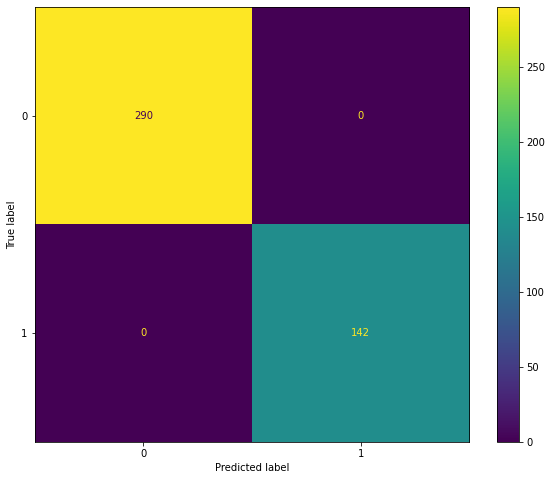

In [ ]:
plot_confusion_matrix(clf_svm_oh2,
                      X_test_M2,
                      y_test_M2,
                      values_format='d',
                      display_labels=['0', '1'])
plt.show()

## MONK-3

In [ ]:
#read train dataset
df_monk3_train = pd.read_csv('./data/MONK/monks-3.train', sep=" ", skipinitialspace=True, names=['class','a1','a2','a3','a4','a5','a6','id'])
df_monk3_train.drop(labels='id', axis=1, inplace=True)

#read test dataset
df_monk3_test = pd.read_csv('./data/MONK/monks-3.test', sep=" ", skipinitialspace=True,  names=['class','a1','a2','a3','a4','a5','a6','id'])
df_monk3_test.drop(labels='id', axis=1, inplace=True)

<AxesSubplot:ylabel='class'>

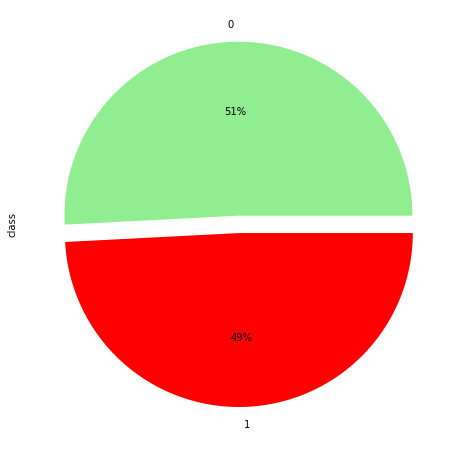

In [ ]:
#plot class distribution in train data
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

df_monk3_train['class'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=['lightgreen', 'red'], explode=(0.05, 0.05))

<AxesSubplot:ylabel='class'>

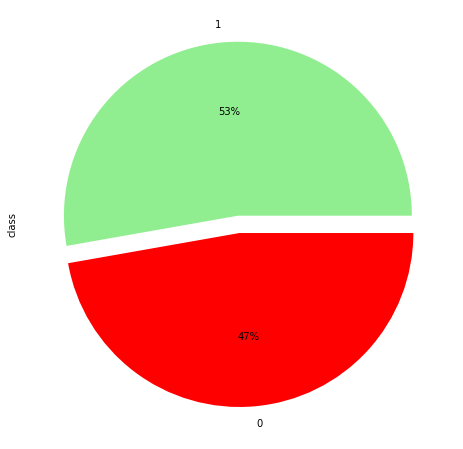

In [ ]:
#plot class distribution in test data
df_monk3_test['class'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=['lightgreen', 'red'], explode=(0.05, 0.05))

In [ ]:
X_train_M3, y_train_M3, X_test_M3, y_test_M3 = split_train_test(df_monk3_train, df_monk3_test)

### One hot encoder

In [ ]:
enc_train = OneHotEncoder()
enc_train.fit(X_train_M3)
X_train_M3 = enc_train.transform(X_train_M3).toarray()
print(X_train_M3.shape)

enc_test = OneHotEncoder()
enc_test.fit(X_test_M3)
X_test_M3 = enc_test.transform(X_test_M3).toarray()
print(X_test_M3.shape)

(122, 17)
(432, 17)


In [ ]:
par_values = [
    {'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 5, 10, 15, 25, 50, 100, 250, 500, 1000], #C must be greater than 0
    'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001, 0.00001],
    'kernel': ['linear', 'rbf', 'sigmoid']},
] 

optimal_par_oh3 = RandomizedSearchCV(
    estimator=SVC(),
    param_distributions=par_values,
    n_iter=150,
    cv=10,
    scoring='accuracy',
    verbose=0
)

optimal_par_oh3.fit(X_train_M3, y_train_M3)
print(optimal_par_oh3.best_params_)

{'kernel': 'linear', 'gamma': 0.01, 'C': 50}


In [ ]:
best_model_oh3 = optimal_par_oh3.best_estimator_
best_model_oh3.fit(X_train_M3, y_train_M3)
best_model_oh3.score(X_test_M3, y_test_M3)

0.9722222222222222

In [ ]:
C_BEST = optimal_par_oh3.best_params_['C']
GAMMA = optimal_par_oh3.best_params_['gamma']
KERNEL = optimal_par_oh3.best_params_['kernel']

clf_svm_oh3 = SVC(C=C_BEST, gamma=GAMMA, kernel=KERNEL)
clf_svm_oh3.fit(X_train_M3, y_train_M3)

train_pred = clf_svm_oh3.predict(X_train_M3)
test_pred = clf_svm_oh3.predict(X_test_M3)

print(classification_report(y_train_M3, train_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93        62
         1.0       0.92      0.95      0.93        60

    accuracy                           0.93       122
   macro avg       0.93      0.93      0.93       122
weighted avg       0.93      0.93      0.93       122



In [ ]:
print(classification_report(y_test_M3, test_pred))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       204
         1.0       1.00      0.95      0.97       228

    accuracy                           0.97       432
   macro avg       0.97      0.97      0.97       432
weighted avg       0.97      0.97      0.97       432



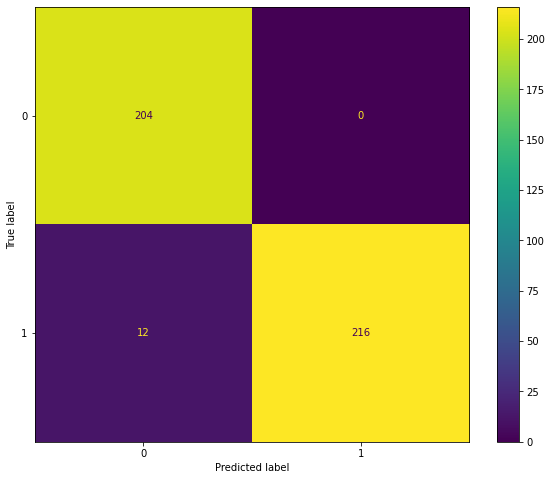

In [ ]:
plot_confusion_matrix(clf_svm_oh3,
                      X_test_M3,
                      y_test_M3,
                      values_format='d',
                      display_labels=['0', '1'])
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d9d840c9-75b3-4185-bb01-105f5cca8d83' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>